# Dataset info
This dataset contains an airline passenger satisfaction survey. 
What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)
Customer Type: The customer type (Loyal customer, disloyal customer)
Age: The actual age of the passengers
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
Flight distance: The flight distance of this journey
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
Ease of Online booking: Satisfaction level of online booking
Gate location: Satisfaction level of Gate location
Food and drink: Satisfaction level of Food and drink
Online boarding: Satisfaction level of online boarding
Seat comfort: Satisfaction level of Seat comfort
Inflight entertainment: Satisfaction level of inflight entertainment
On-board service: Satisfaction level of On-board service
Leg room service: Satisfaction level of Leg room service
Baggage handling: Satisfaction level of baggage handling
Check-in service: Satisfaction level of Check-in service
Inflight service: Satisfaction level of inflight service
Cleanliness: Satisfaction level of Cleanliness
Departure Delay in Minutes: Minutes delayed when departure
Arrival Delay in Minutes: Minutes delayed when Arrival
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Import

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import os
import tensorflow.keras.backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import binary_crossentropy
from keras.regularizers import l1_l2
from tensorflow.keras.utils import plot_model

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")

# Preprocessing

In [93]:
if os.path.exists('train_file_01.txt'):
    os.remove('train_file_01.txt')

In [94]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
display(df_train.head(5))
display(df_test.head(5))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [95]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('id', axis=1)

df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

df_train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [96]:
print(df_train.shape)
print(df_test.shape)

(103904, 23)
(25976, 23)


In [97]:
print(df_train.shape)
dups = df_train.duplicated()
print(dups[dups == True])
df_train = df_train.drop_duplicates()
print(df_train.shape)

print(df_test.shape)
dups = df_test.duplicated()
print(dups[dups == True])
df_test = df_test.drop_duplicates()
print(df_test.shape)

(103904, 23)
Series([], dtype: bool)
(103904, 23)
(25976, 23)
Series([], dtype: bool)
(25976, 23)


In [98]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

In [99]:
mean_arrival_delay = df_train['Arrival Delay in Minutes'].mean()
df_train['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

mean_arrival_delay = df_test['Arrival Delay in Minutes'].mean()
df_test['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

In [100]:
df_train['Arrival Delay in Minutes'].isnull().sum()

0

In [101]:
df_test['Arrival Delay in Minutes'].isnull().sum()

0

In [102]:
df_train.describe(include='all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [103]:
df_test.describe(include='all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976,25976,25976.000000,25976,25976,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,13172,21177,NaN,18038,12495,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14573
mean,NaN,NaN,39.620958,NaN,NaN,1193.788459,2.724746,3.046812,2.756775,2.977094,...,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,NaN
std,NaN,NaN,15.135685,NaN,NaN,998.683999,1.335384,1.533371,1.412951,1.282133,...,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.457549,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,849.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,NaN


In [104]:
df_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [105]:
categorical_columns = []
numerical_columns = []
for col in df_train:
    if(df_train[col].dtype=='O'):
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print(categorical_columns)
print(numerical_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


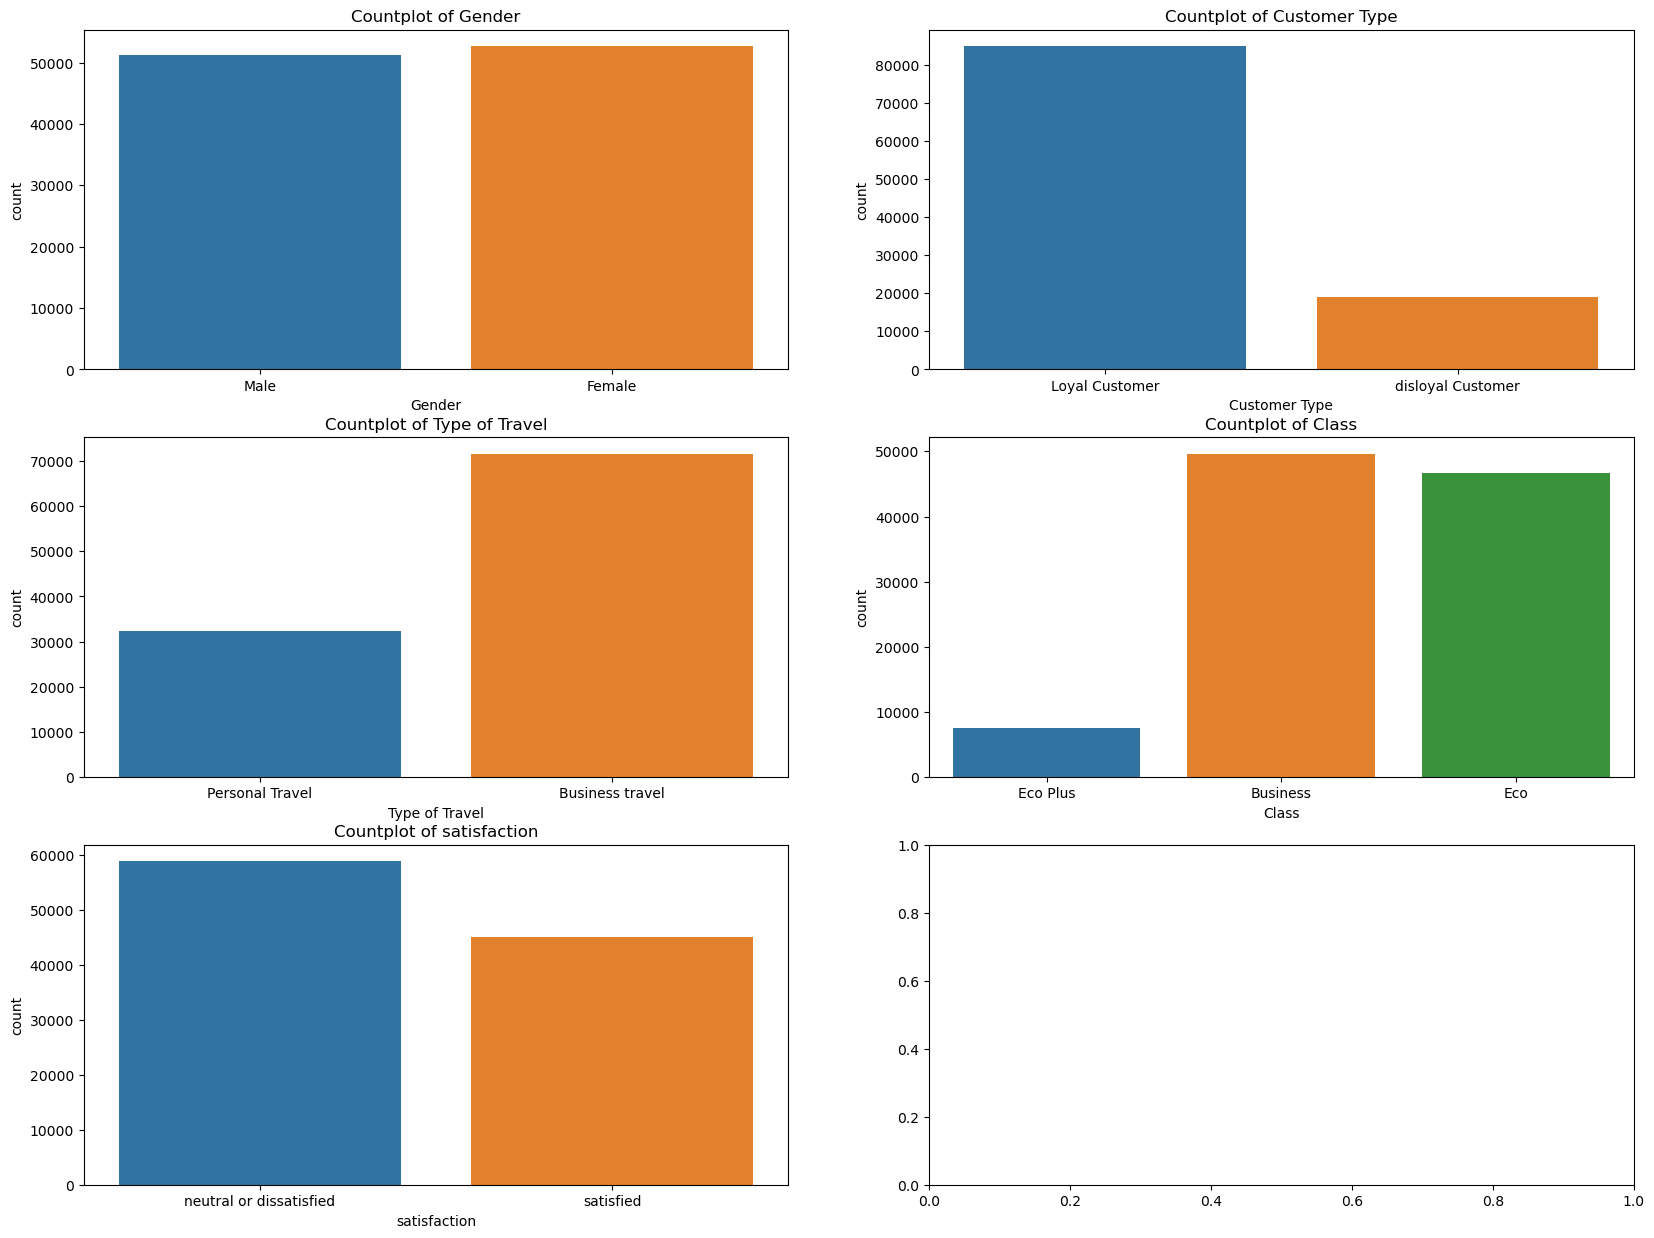

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for i, feature in enumerate(categorical_columns):
    sea.countplot(x=feature, data=df_train, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Countplot of {feature}')
 
plt.show()

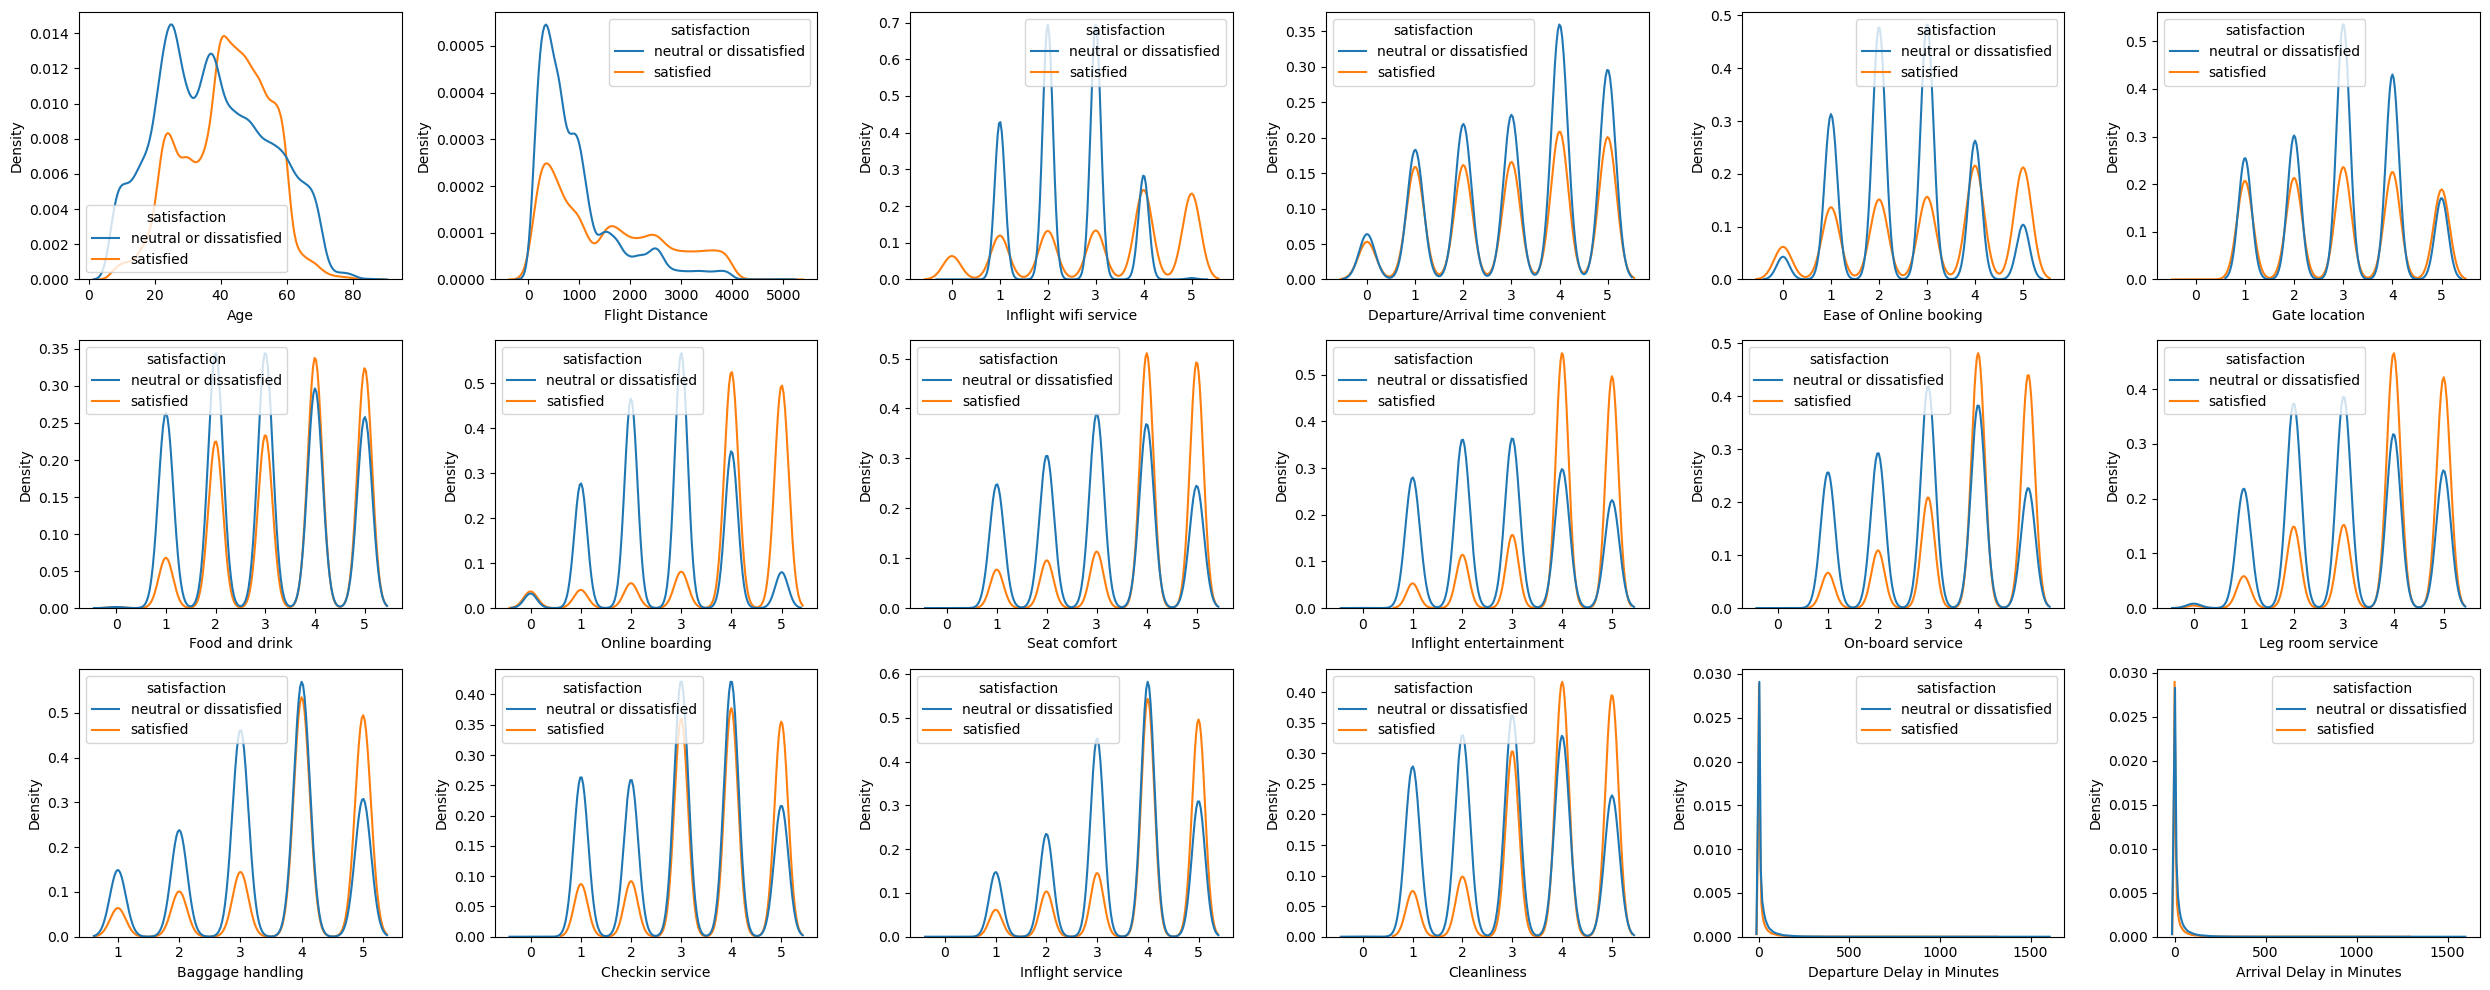

In [107]:
plt.figure(figsize=(25, 10))
for i in range(0, len (numerical_columns)):
    plt.subplot(3, 6, i+1)
    sea.kdeplot(x = df_train[numerical_columns[i]], hue = df_train['satisfaction'])
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

In [108]:
label_encoder = LabelEncoder()

df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
print("Gender:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
print("Gender:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


df_train['Customer Type'] = label_encoder.fit_transform(df_train['Customer Type'])
print("Customer Type:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_test['Customer Type'] = label_encoder.fit_transform(df_test['Customer Type'])
print("Customer Type:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


df_train['Type of Travel'] = label_encoder.fit_transform(df_train['Type of Travel'])
print("Type of Travel:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_test['Type of Travel'] = label_encoder.fit_transform(df_test['Type of Travel'])
print("Type of Travel:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


df_train['satisfaction'] = label_encoder.fit_transform(df_train['satisfaction'])
print("satisfaction:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_test['satisfaction'] = label_encoder.fit_transform(df_test['satisfaction'])
print("satisfaction:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


df_train['Class'] = label_encoder.fit_transform(df_train['Class'])
print("Class:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_test['Class'] = label_encoder.fit_transform(df_test['Class'])
print("Class:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_train.head(5)

Gender: {'Female': 0, 'Male': 1}
Gender: {'Female': 0, 'Male': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## Outliers

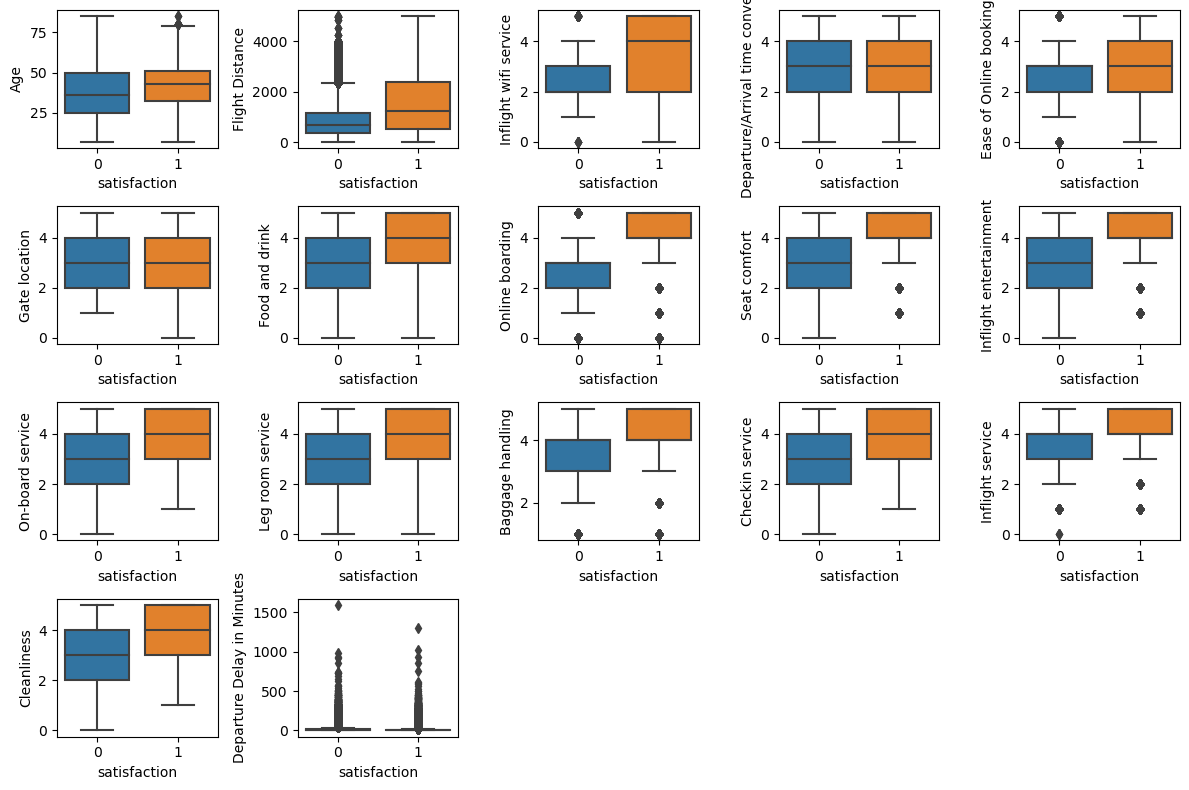

In [109]:
plt.figure(figsize=(12, 8))

for i in range(0, len(numerical_columns)-1):
    plt.subplot(4, 5, i+1)
    sea.boxplot(x = df_train['satisfaction'], y = df_train[numerical_columns[i]])
    plt.tight_layout()

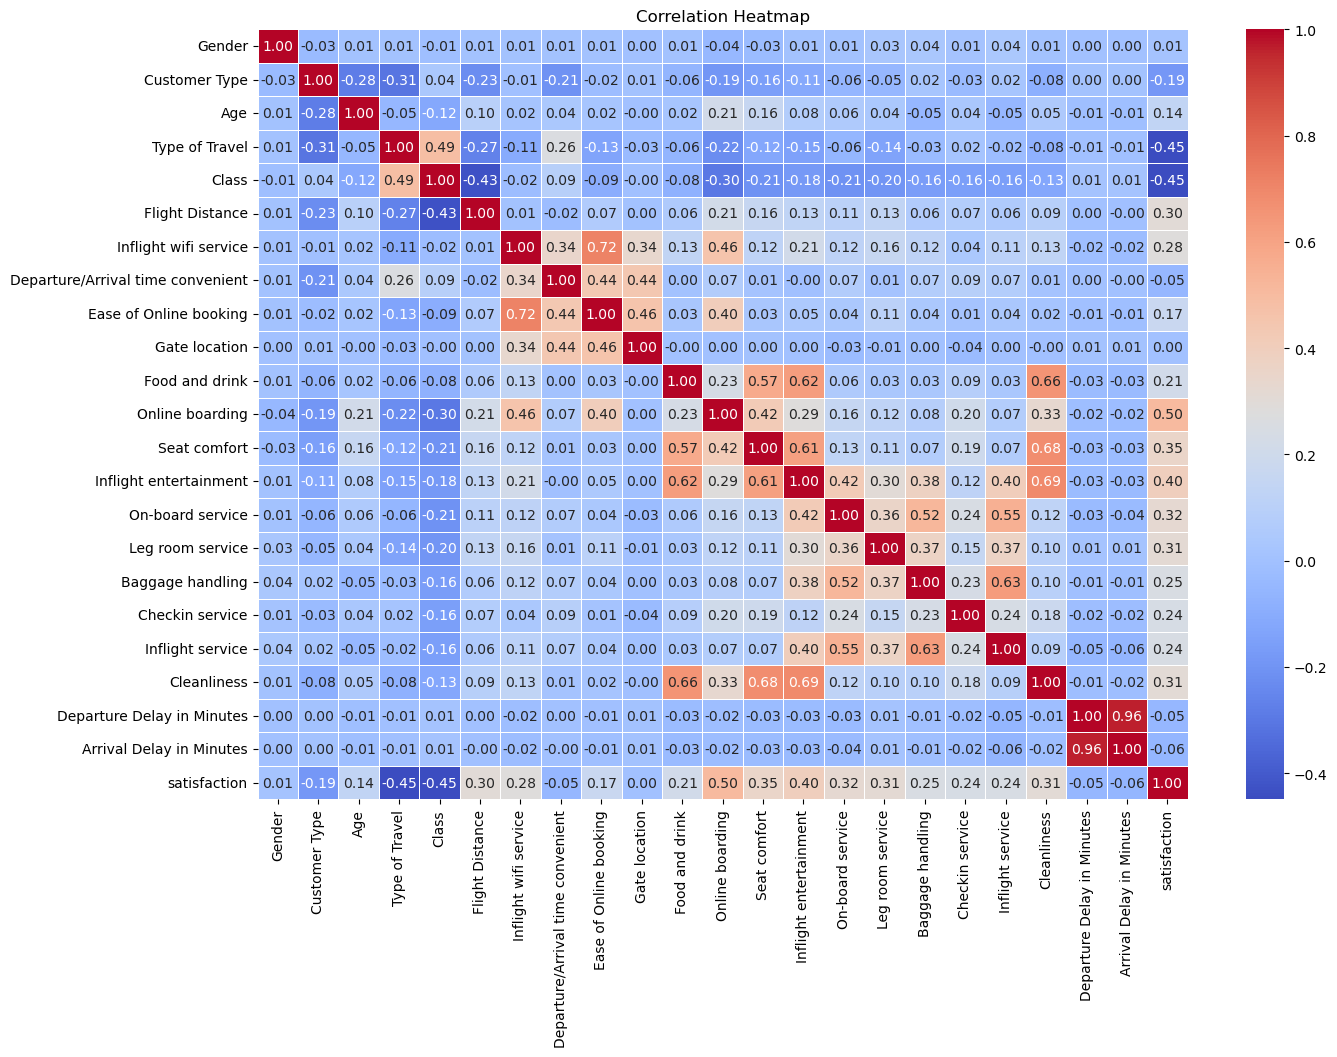

In [110]:
plt.figure(figsize=(15, 10))
heatmap = sea.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [111]:
col_to_drop = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_train['Mean Delay'] = df_train[col_to_drop].mean(axis=1)
df_test['Mean Delay'] = df_test[col_to_drop].mean(axis=1)

df_train.drop(col_to_drop, axis=1, inplace=True)
df_test.drop(col_to_drop, axis=1, inplace=True)

numerical_columns.remove('Departure Delay in Minutes')
numerical_columns.remove('Arrival Delay in Minutes')
numerical_columns.append('Mean Delay')

In [112]:
def StandardScale(data):
    scale=StandardScaler()
    datapom=pd.DataFrame()
    clas = data['satisfaction']
    datapom = data.loc[:, data.columns != 'satisfaction']
    datapom = pd.DataFrame(scale.fit_transform(datapom.values), columns=datapom.columns, index=data.index)
    datapom['satisfaction'] = clas
    return datapom

df_train = StandardScale(df_train)
df_test = StandardScale(df_test)

In [113]:
X_train=df_train.loc[:,df_train.columns!='satisfaction']
Y_train=pd.DataFrame()
Y_train['satisfaction']=df_train['satisfaction']
X_train,X_val,Y_train,Y_val=train_test_split(X_train, Y_train, test_size=0.1, random_state=7)
X_test=df_test.loc[:,df_test.columns!='satisfaction']
Y_test=pd.DataFrame()
Y_test['satisfaction']=df_test['satisfaction']

# NN testing

In [114]:
def add_to_results(units_list, batch_size, epochs, optimizer, history, acc_test, loss_test, loss_f = 'binary_crossentropy'):
    df_row = pd.DataFrame({
        'Layers': [str(units_list)],
        'batch_size': [batch_size],
        'epochs': [epochs],
        'optimizer': [optimizer],
        'loss': [loss_f],
        'Accuracy': [history.history['accuracy'][-1]],
        'Loss': [history.history['loss'][-1]],
        'Accuracy_val': [history.history['val_accuracy'][-1]],
        'Loss_val': [history.history['val_loss'][-1]],
        'Accuracy_test': [acc_test],
        'Loss_test': [loss_test]
    })
    return df_row


def visualize_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

def visualize_results(result):
    display(result)
    visualize_history(history)


In [115]:
dfs=[]

## Mreza: [8, D, 4, 2, 1] - Optimizer: Adam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[8,D,4,2,1]",16,EarlyStopping(21),Adam(0.01),binary_crossentropy,0.938618,0.15352,0.949283,0.12837,0.946566,0.127908


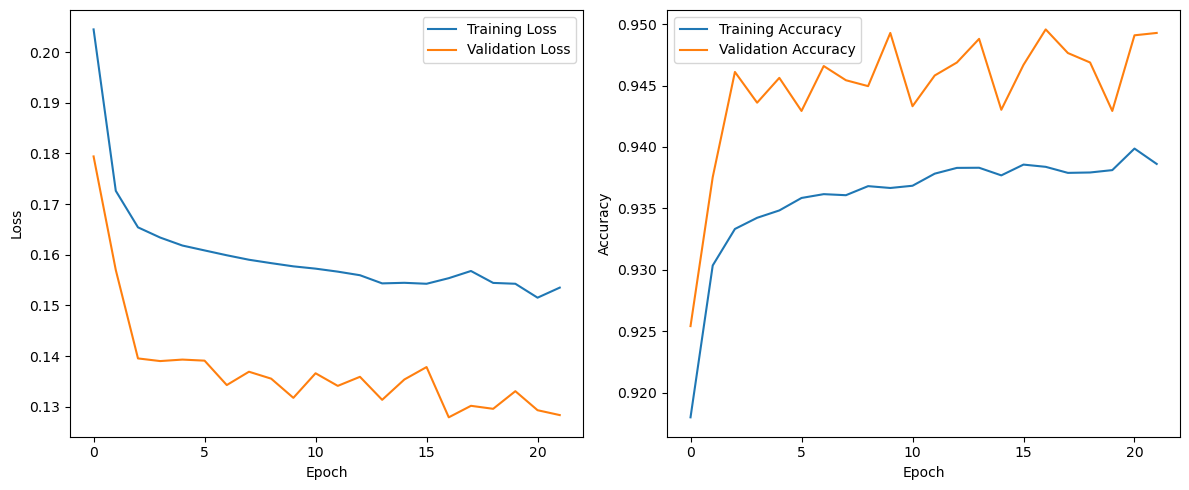

In [116]:
model = Sequential()
model.add(Dense(units=8, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=2, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[8,D,4,2,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [32,D,1] - Optimizer: Adam

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[32,D,1]",16,EarlyStopping(22),Adam(0.01),binary_crossentropy,0.955407,0.110452,0.957078,0.100393,0.957538,0.102987


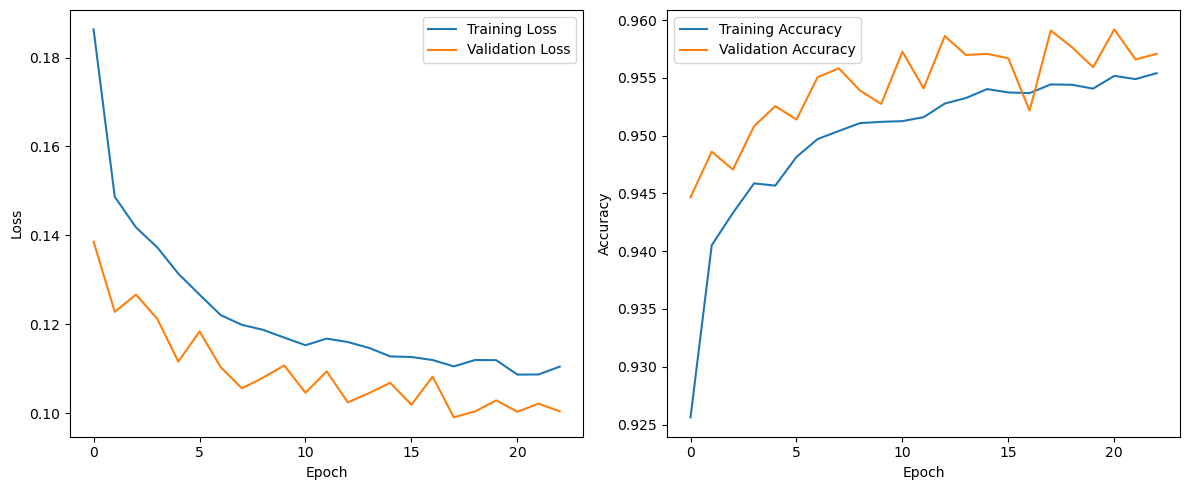

In [117]:
model = Sequential()
model.add(Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])

loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)

stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[32,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)


## Mreza: [64,D,32,D,32,1] - Optimizer: Adam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[64,D,32,D,32,1]",16,EarlyStopping(27),Adam(0.01),binary_crossentropy,0.956894,0.105026,0.961313,0.097492,0.961426,0.094785


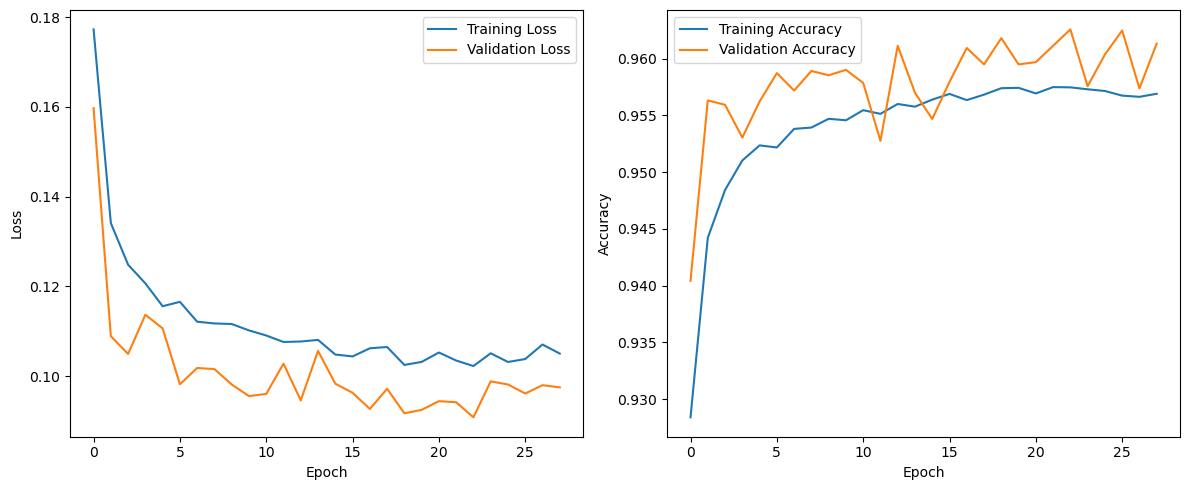

In [118]:
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[64,D,32,D,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [512,D,256,D,128,64,32,1] - Optimizer: Adam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adam(0.01),binary_crossentropy,0.868692,0.383822,0.878549,0.370906,0.937635,0.137701


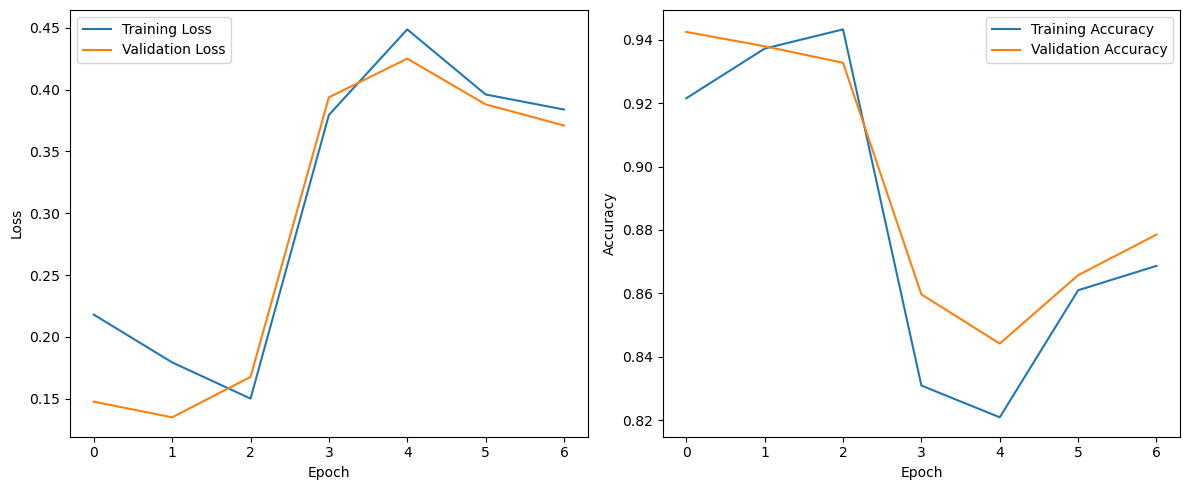

In [119]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,128,64,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [512,D,256,D,1] - Optimizer: Adam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,1]",16,EarlyStopping(13),Adam(0.01),binary_crossentropy,0.945494,0.137789,0.945722,0.118087,0.953265,0.114382


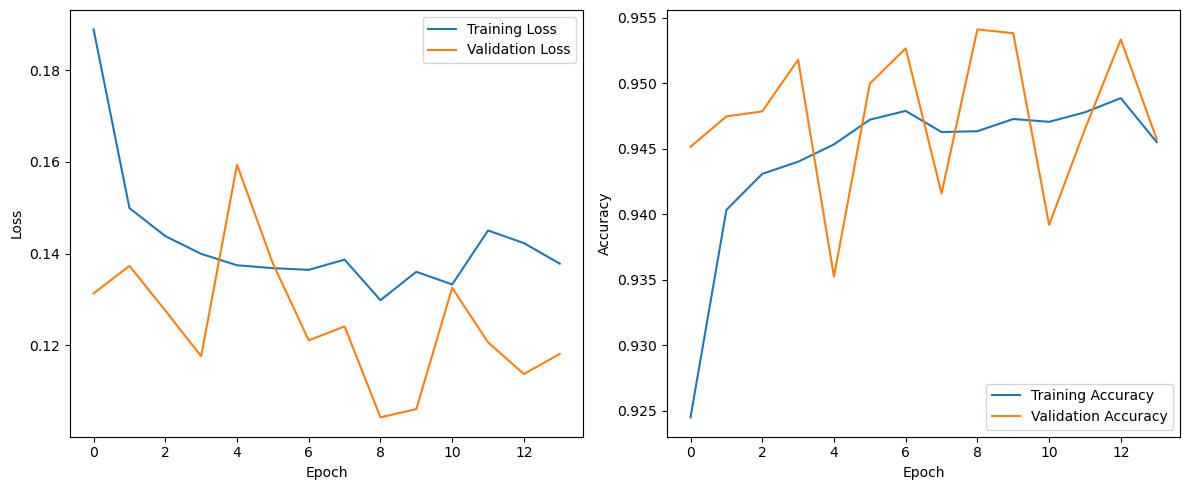

In [120]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [32,D,1] - Optimizer: Adamax(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[32,D,1]",16,EarlyStopping(45),Adamax(0.01),binary_crossentropy,0.956477,0.103931,0.958329,0.096632,0.960002,0.09718


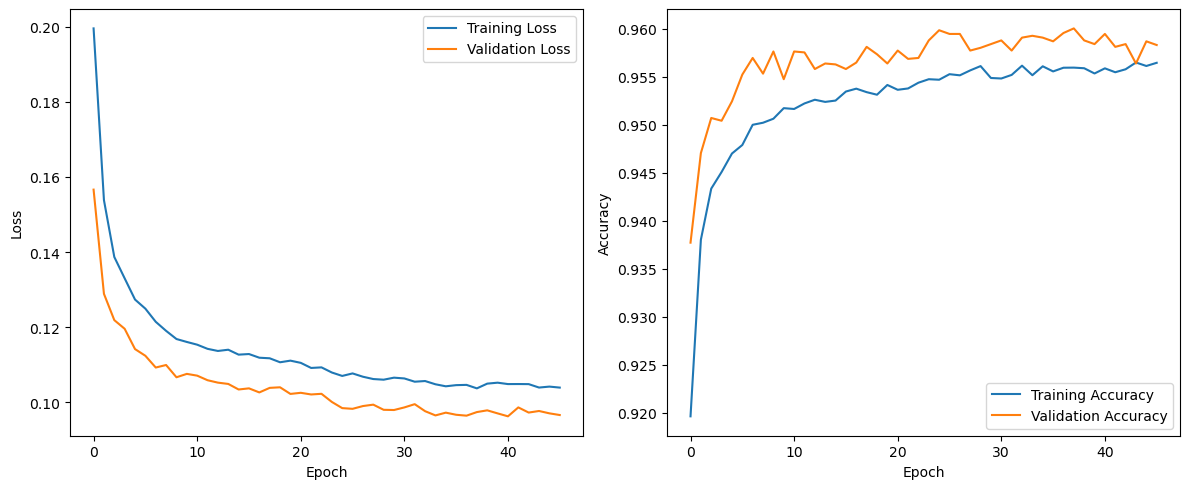

In [121]:
model = Sequential()
model.add(Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[32,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [64,D,32,D,32,1] - Optimizer: Adamax(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[64,D,32,D,32,1]",16,EarlyStopping(23),Adamax(0.01),binary_crossentropy,0.962208,0.088672,0.962564,0.085447,0.963312,0.086667


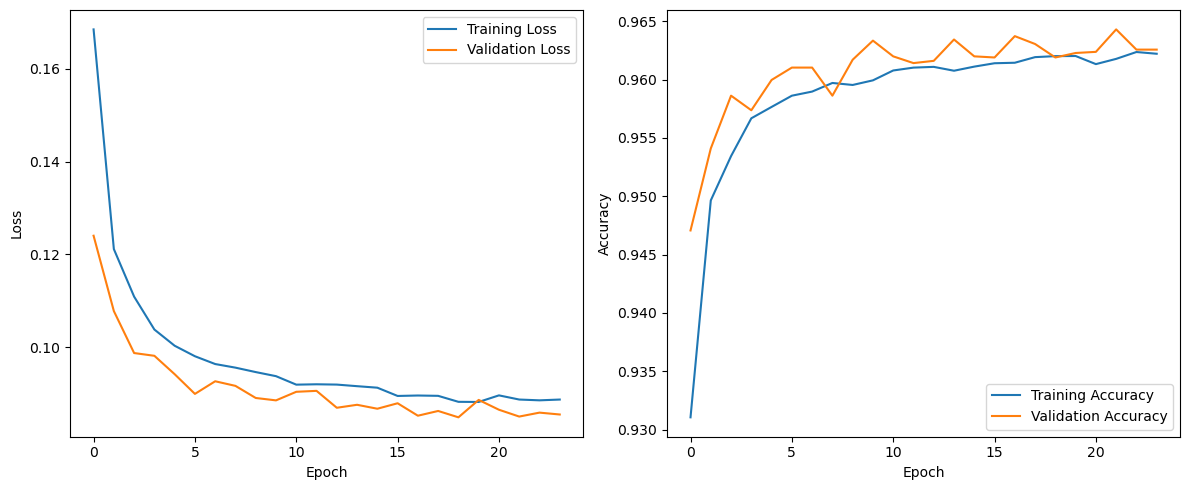

In [122]:
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[64,D,32,D,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [512,D,256,D,1] - Optimizer: Adamax(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,1]",16,EarlyStopping(11),Adamax(0.01),binary_crossentropy,0.965898,0.07911,0.962852,0.09155,0.961965,0.086393


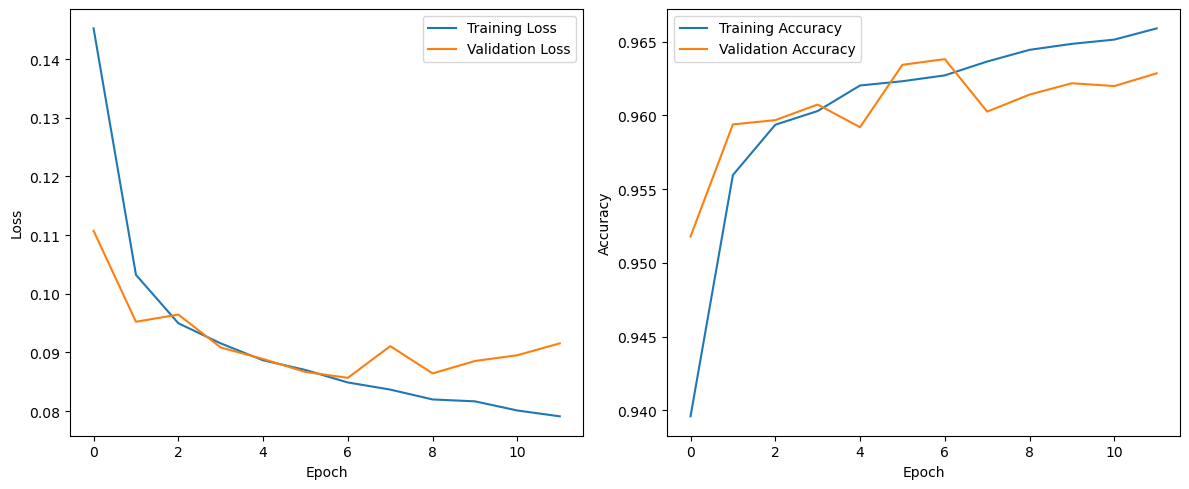

In [123]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [512,D,256,D,128,64,32,1] - Optimizer: Adamax(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.96497,0.087367,0.964929,0.085613


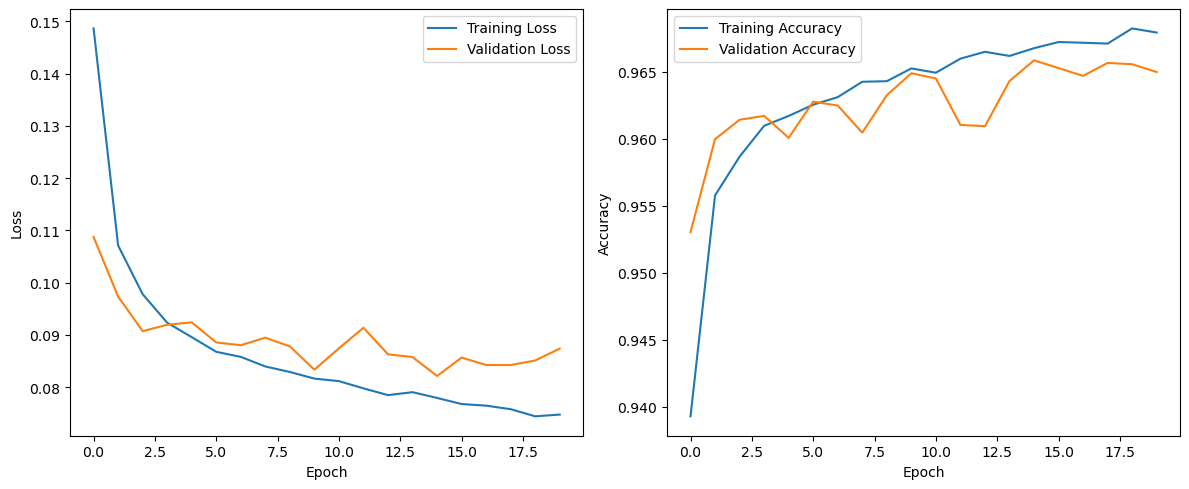

In [124]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,128,64,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [32,D,1] - Optimizer: Nadam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[32,D,1]",16,EarlyStopping(11),Nadam(0.01),binary_crossentropy,0.951493,0.116485,0.948898,0.112383,0.955305,0.105933


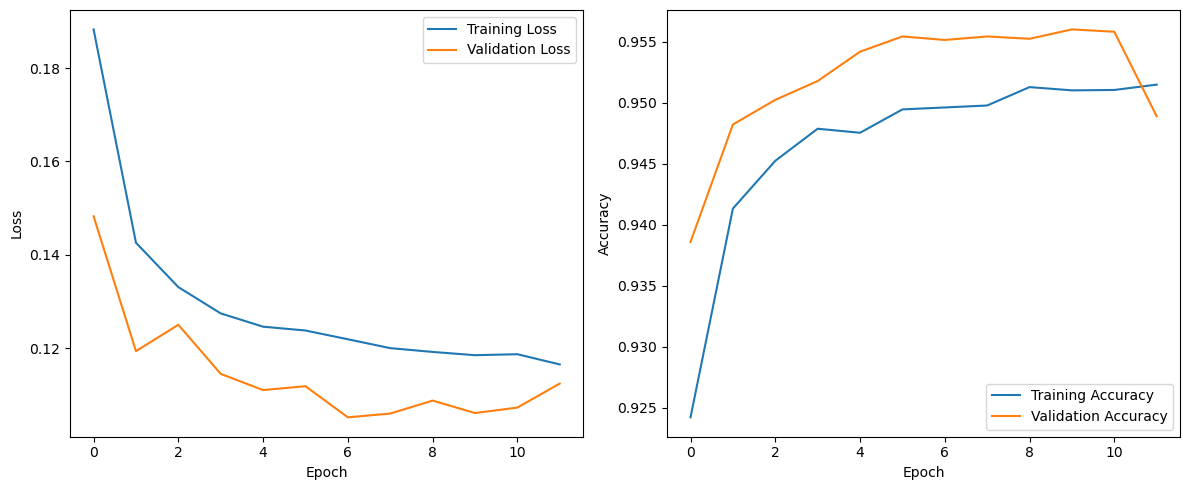

In [125]:
model = Sequential()
model.add(Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Nadam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[32,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Nadam(0.01)', history, acc_test, loss_test)

dfs.append(result)

visualize_results(result)

## Mreza [64,D,32,D,32,1] - Optimizer: Nadam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[64,D,32,D,32,1]",16,EarlyStopping(23),Nadam(0.01),binary_crossentropy,0.958252,0.102165,0.95958,0.096813,0.960887,0.093381


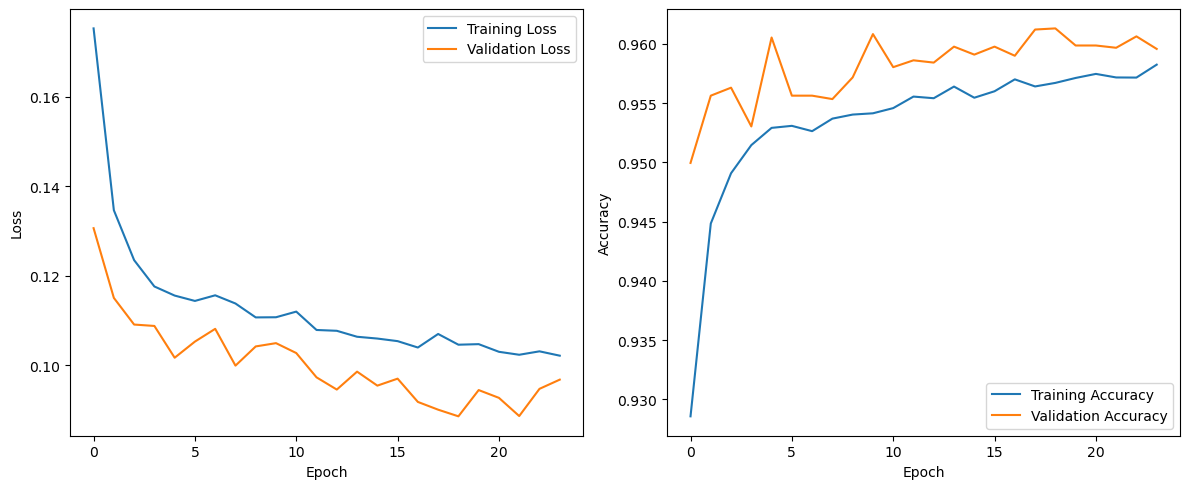

In [126]:
model = Sequential()
model.add(Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Nadam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[64,D,32,D,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Nadam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza [512,D,256,D,1] - Optimizer: Nadam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,1]",16,EarlyStopping(22),Nadam(0.01),binary_crossentropy,0.947237,0.163456,0.951112,0.114733,0.955767,0.115143


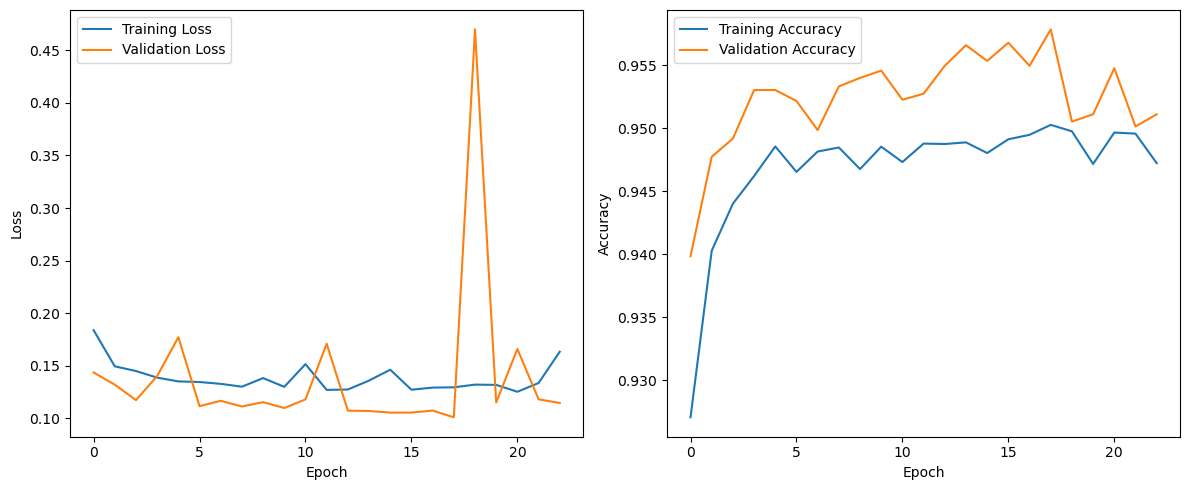

In [127]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Nadam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,1]', 16, f'EarlyStopping({stopped_epoch})', 'Nadam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Mreza: [512,D,256,D,128,64,32,1] - Optimizer: Nadam(0.01)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Nadam(0.01),binary_crossentropy,0.793269,0.481123,0.773073,0.501643,0.951571,0.124426


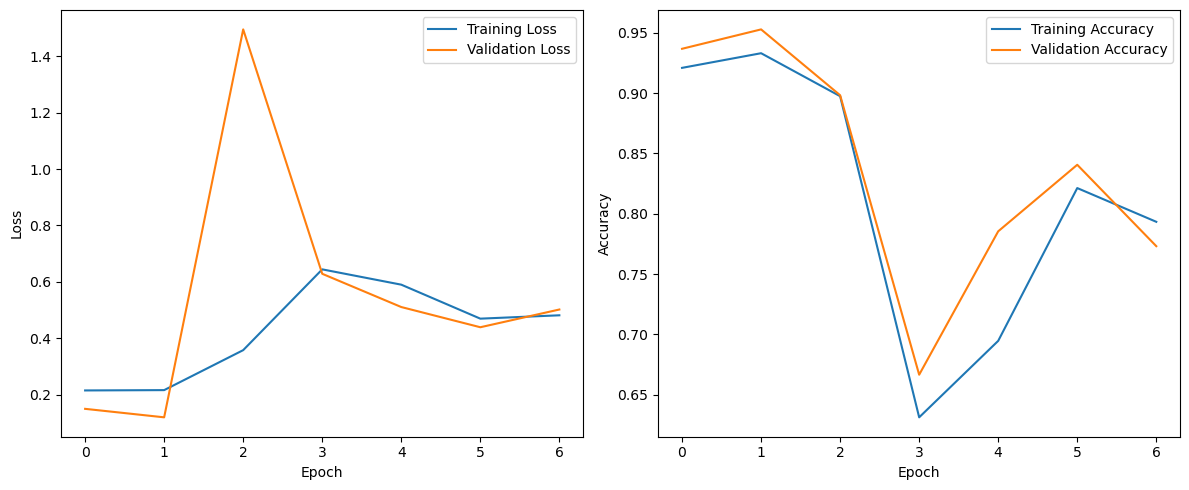

In [128]:
model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Nadam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,128,64,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Nadam(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Rezultati

In [129]:
results = pd.DataFrame(columns=['Layers', 'batch_size', 'epochs', 'learning_rate', 'optimizer', 'loss'
                                'Accuracy', 'Loss','Accuracy_val', 'Loss_val', 'Accuracy_test', 'Loss_test', 'History'])

results = pd.concat(dfs, ignore_index=True)
display(results)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[8,D,4,2,1]",16,EarlyStopping(21),Adam(0.01),binary_crossentropy,0.938618,0.153520,0.949283,0.128370,0.946566,0.127908
1,"[32,D,1]",16,EarlyStopping(22),Adam(0.01),binary_crossentropy,0.955407,0.110452,0.957078,0.100393,0.957538,0.102987
2,"[64,D,32,D,32,1]",16,EarlyStopping(27),Adam(0.01),binary_crossentropy,0.956894,0.105026,0.961313,0.097492,0.961426,0.094785
3,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adam(0.01),binary_crossentropy,0.868692,0.383822,0.878549,0.370906,0.937635,0.137701
4,"[512,D,256,D,1]",16,EarlyStopping(13),Adam(0.01),binary_crossentropy,0.945494,0.137789,0.945722,0.118087,0.953265,0.114382
5,"[32,D,1]",16,EarlyStopping(45),Adamax(0.01),binary_crossentropy,0.956477,0.103931,0.958329,0.096632,0.960002,0.097180
6,"[64,D,32,D,32,1]",16,EarlyStopping(23),Adamax(0.01),binary_crossentropy,0.962208,0.088672,0.962564,0.085447,0.963312,0.086667
7,"[512,D,256,D,1]",16,EarlyStopping(11),Adamax(0.01),binary_crossentropy,0.965898,0.079110,0.962852,0.091550,0.961965,0.086393
8,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.964970,0.087367,0.964929,0.085613
9,"[32,D,1]",16,EarlyStopping(11),Nadam(0.01),binary_crossentropy,0.951493,0.116485,0.948898,0.112383,0.955305,0.105933


## Aktivaciona funkcija - tanh

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]-tanh",16,EarlyStopping(18),Adamax(0.001),binary_crossentropy,0.968037,0.072601,0.961986,0.089613,0.962427,0.08759


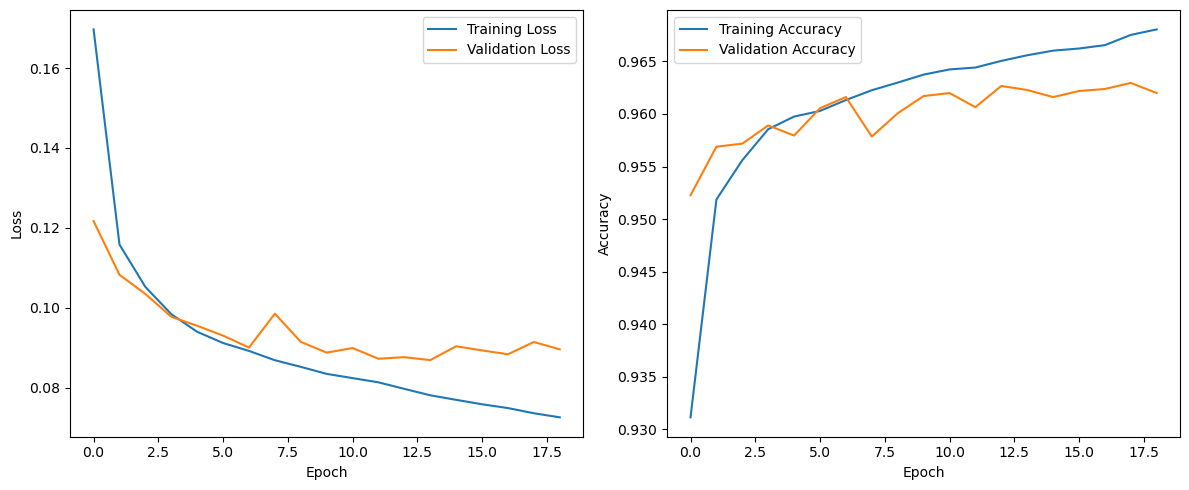

In [130]:
model = Sequential()
model.add(Dense(units=512, activation="tanh", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="tanh"))
model.add(Dense(units=64, activation="tanh"))
model.add(Dense(units=32, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('[512,D,256,D,128,64,32,1]-tanh', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.001)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

# Early Stopping + ExponentialDecay

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(10),Adamax(ExponentialDecay),binary_crossentropy,0.966604,0.076026,0.964681,0.085812,0.963197,0.086264


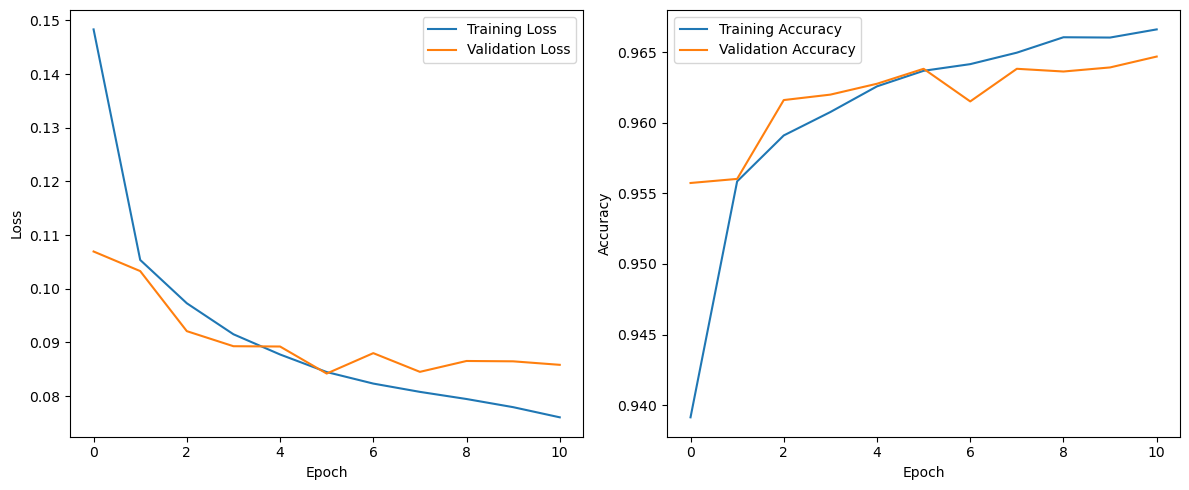

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",32,EarlyStopping(15),Adamax(ExponentialDecay),binary_crossentropy,0.969159,0.069776,0.963911,0.084488,0.964544,0.085048


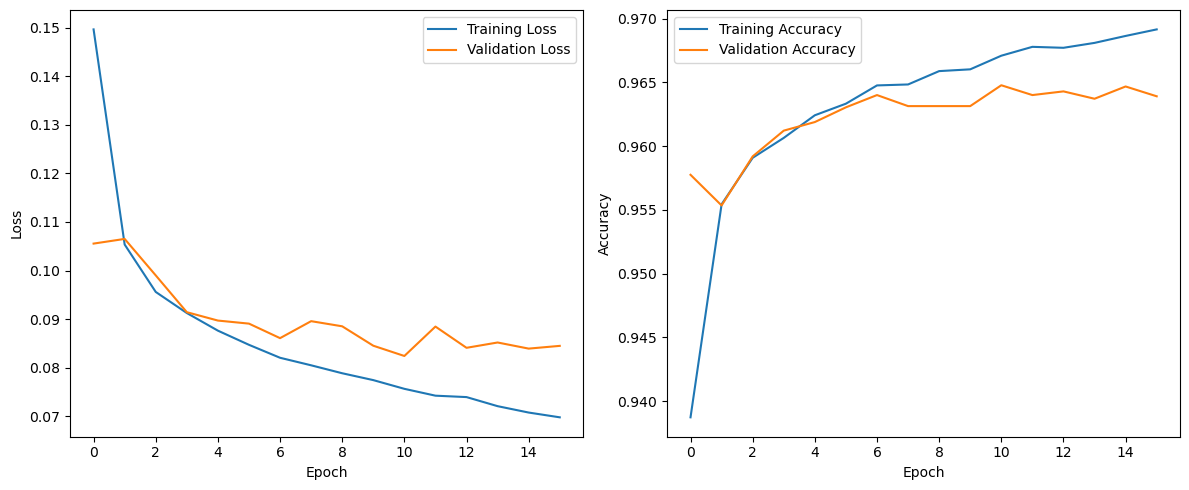

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(15),Adamax(ExponentialDecay),binary_crossentropy,0.968999,0.069963,0.965836,0.084103,0.965006,0.08421


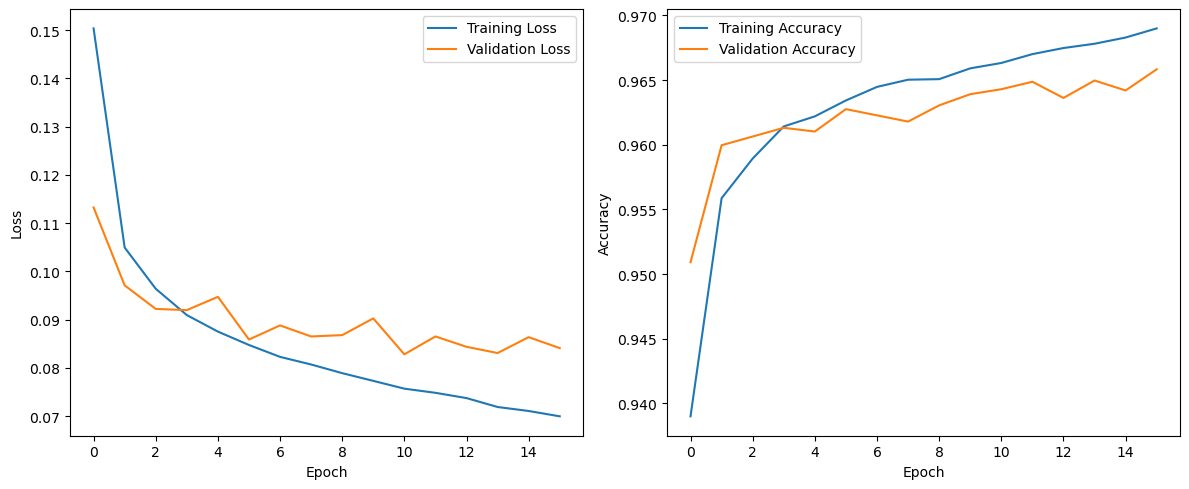

In [131]:
batch_sizes = [16, 32, 64]
for batch_size in batch_sizes:
    learning_rate = 1e-2
    decay_steps = 10000
    decay_rate = 0.9

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate
    )

    optimizer = Adamax(learning_rate=lr_schedule)  
    model = Sequential()
    model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.1))
    model.add(Dense(units=256, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
    loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
    stopped_epoch = early_stopping.stopped_epoch

    result = add_to_results('[512,D,256,D,128,64,32,1]', batch_size, f'EarlyStopping({stopped_epoch})', 'Adamax(ExponentialDecay)', history, acc_test, loss_test)

    dfs.append(result)
    visualize_results(result)

## Rezultati

In [132]:
results = pd.concat(dfs, ignore_index=True)
display(results)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[8,D,4,2,1]",16,EarlyStopping(21),Adam(0.01),binary_crossentropy,0.938618,0.153520,0.949283,0.128370,0.946566,0.127908
1,"[32,D,1]",16,EarlyStopping(22),Adam(0.01),binary_crossentropy,0.955407,0.110452,0.957078,0.100393,0.957538,0.102987
2,"[64,D,32,D,32,1]",16,EarlyStopping(27),Adam(0.01),binary_crossentropy,0.956894,0.105026,0.961313,0.097492,0.961426,0.094785
3,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adam(0.01),binary_crossentropy,0.868692,0.383822,0.878549,0.370906,0.937635,0.137701
4,"[512,D,256,D,1]",16,EarlyStopping(13),Adam(0.01),binary_crossentropy,0.945494,0.137789,0.945722,0.118087,0.953265,0.114382
5,"[32,D,1]",16,EarlyStopping(45),Adamax(0.01),binary_crossentropy,0.956477,0.103931,0.958329,0.096632,0.960002,0.097180
6,"[64,D,32,D,32,1]",16,EarlyStopping(23),Adamax(0.01),binary_crossentropy,0.962208,0.088672,0.962564,0.085447,0.963312,0.086667
7,"[512,D,256,D,1]",16,EarlyStopping(11),Adamax(0.01),binary_crossentropy,0.965898,0.079110,0.962852,0.091550,0.961965,0.086393
8,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.964970,0.087367,0.964929,0.085613
9,"[32,D,1]",16,EarlyStopping(11),Nadam(0.01),binary_crossentropy,0.951493,0.116485,0.948898,0.112383,0.955305,0.105933


# L1 L2

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"L1_L2_reg - [512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adamax(0.01),binary_crossentropy,0.93603,0.320013,0.940237,0.330453,0.93956,0.293333


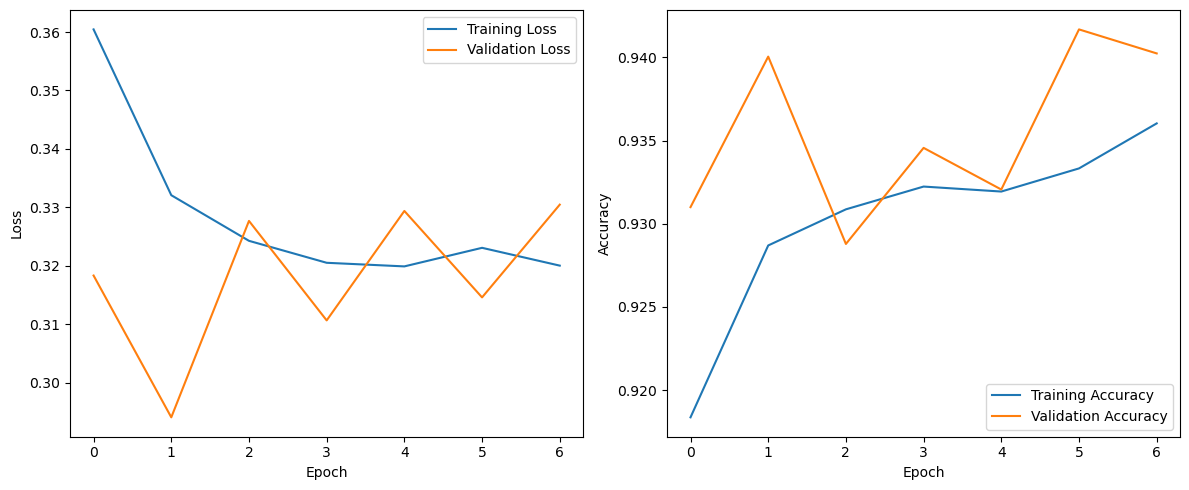

In [133]:
model = Sequential()
model.add(Dense(units=512, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=Adamax(learning_rate=0.01), loss=binary_crossentropy, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

history = model.fit(X_train, Y_train, batch_size=16, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
stopped_epoch = early_stopping.stopped_epoch

result = add_to_results('L1_L2_reg - [512,D,256,D,128,64,32,1]', 16, f'EarlyStopping({stopped_epoch})', 'Adamax(0.01)', history, acc_test, loss_test)

dfs.append(result)
visualize_results(result)

## Rezultati

In [134]:
results = pd.concat(dfs, ignore_index=True)
display(results)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[8,D,4,2,1]",16,EarlyStopping(21),Adam(0.01),binary_crossentropy,0.938618,0.153520,0.949283,0.128370,0.946566,0.127908
1,"[32,D,1]",16,EarlyStopping(22),Adam(0.01),binary_crossentropy,0.955407,0.110452,0.957078,0.100393,0.957538,0.102987
2,"[64,D,32,D,32,1]",16,EarlyStopping(27),Adam(0.01),binary_crossentropy,0.956894,0.105026,0.961313,0.097492,0.961426,0.094785
3,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adam(0.01),binary_crossentropy,0.868692,0.383822,0.878549,0.370906,0.937635,0.137701
4,"[512,D,256,D,1]",16,EarlyStopping(13),Adam(0.01),binary_crossentropy,0.945494,0.137789,0.945722,0.118087,0.953265,0.114382
5,"[32,D,1]",16,EarlyStopping(45),Adamax(0.01),binary_crossentropy,0.956477,0.103931,0.958329,0.096632,0.960002,0.097180
6,"[64,D,32,D,32,1]",16,EarlyStopping(23),Adamax(0.01),binary_crossentropy,0.962208,0.088672,0.962564,0.085447,0.963312,0.086667
7,"[512,D,256,D,1]",16,EarlyStopping(11),Adamax(0.01),binary_crossentropy,0.965898,0.079110,0.962852,0.091550,0.961965,0.086393
8,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.964970,0.087367,0.964929,0.085613
9,"[32,D,1]",16,EarlyStopping(11),Nadam(0.01),binary_crossentropy,0.951493,0.116485,0.948898,0.112383,0.955305,0.105933


# Testiranje loss funkcija

In [136]:
def run_Model(loss_f='binary_crossentropy', loss='binary_crossentropy', X_train = X_train, Y_train = Y_train, X_val = X_val, Y_val = Y_val, X_test = X_test, Y_test = Y_test):
    print(f'Model:{loss}')
    
    batch_size = 64
    learning_rate = 1e-2
    decay_steps = 10000
    decay_rate = 0.9

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate
    )

    optimizer = Adamax(learning_rate=lr_schedule)  
    model = Sequential()
    model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.1))
    model.add(Dense(units=256, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss_f, metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
    loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
    stopped_epoch = early_stopping.stopped_epoch

    result = add_to_results('[512,D,256,D,128,64,32,1]', batch_size, f'EarlyStopping({stopped_epoch})', 'Adamax(ExponentialDecay)', history, acc_test, loss_test, loss)

    dfs.append(result)
    visualize_results(result)

def square_loss(y_true, y_pred):     
    loss = K.square(float(y_pred) - float(y_true))
    loss = K.sum(loss, axis=-1)
    return loss

def abs_loss(y_true, y_pred):   
    loss = K.abs(float(y_pred) - float(y_true))
    loss = K.sum(loss, axis=-1)   
    return loss

def weighted_binary_crossentropy(y_true, y_pred, weights=[0.2, 0.8]):
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    weights = [float(w) for w in weights]
    loss = -(weights[0] * float(y_true) * K.log(float(y_pred)) + weights[1] * (1 - float(y_true)) * K.log(1 - float(y_pred)))
    return K.mean(loss, axis=-1)

Model:binary_crossentropy


,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(21),Adamax(ExponentialDecay),binary_crossentropy,0.970924,0.065572,0.962949,0.095303,0.965006,0.084399


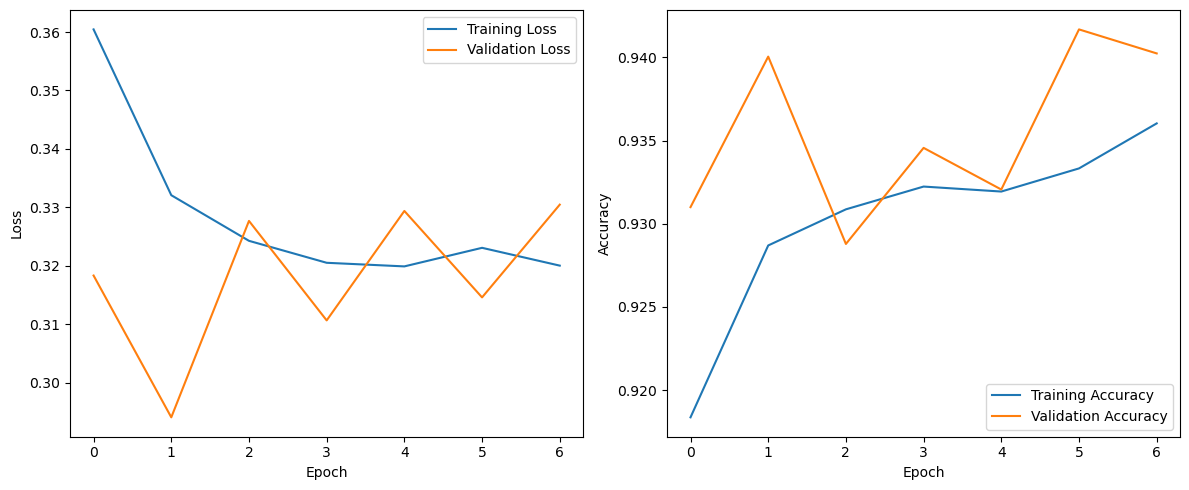

Model:square_loss


,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(29),Adamax(ExponentialDecay),square_loss,0.973587,0.019056,0.963911,0.02777,0.965353,0.026051


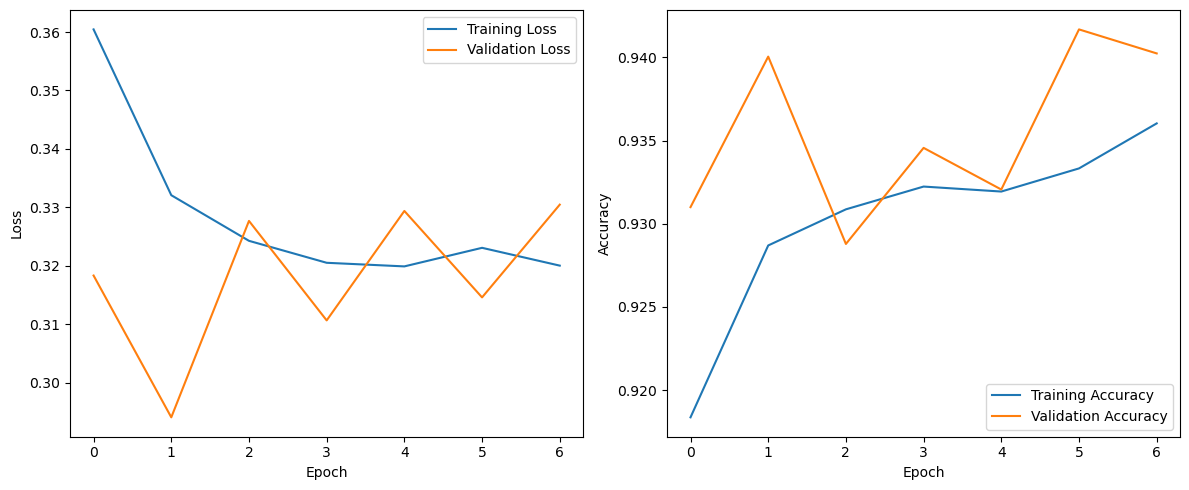

Model:abs_loss


,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(58),Adamax(ExponentialDecay),abs_loss,0.923946,0.076056,0.926379,0.073596,0.925816,0.074199


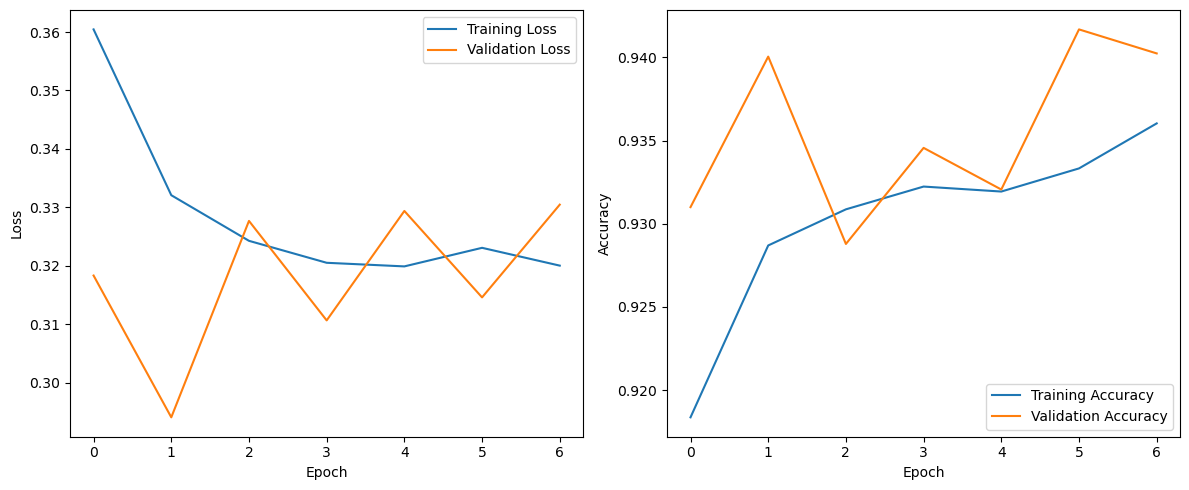

Model:weighted_binary_crossentropy


,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(21),Adamax(ExponentialDecay),weighted_binary_crossentropy,0.964764,0.023056,0.962275,0.027646,0.961079,0.0293


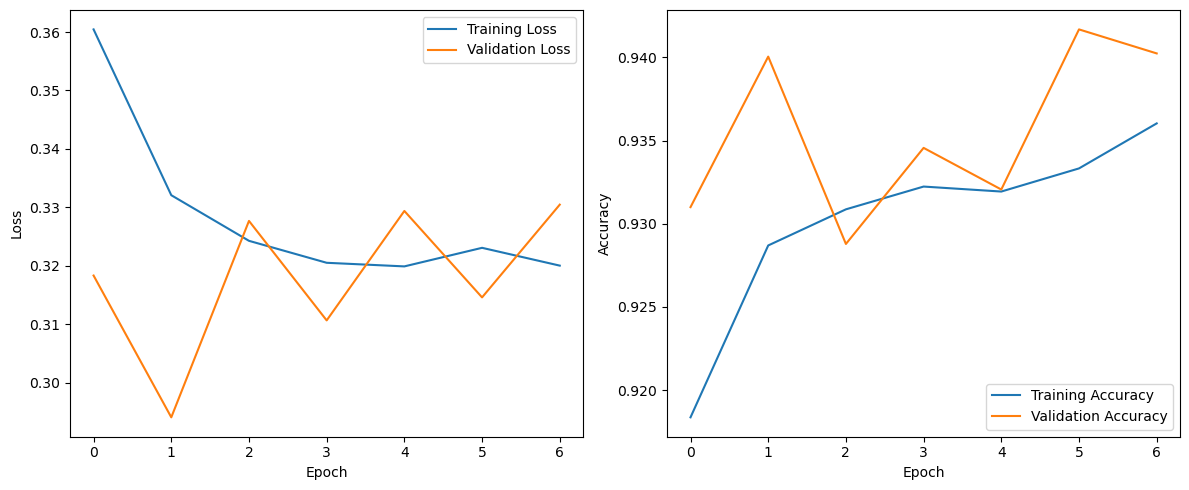

In [137]:
run_Model()
run_Model(square_loss, 'square_loss')
run_Model(abs_loss, 'abs_loss')
run_Model(weighted_binary_crossentropy, 'weighted_binary_crossentropy')

# Model

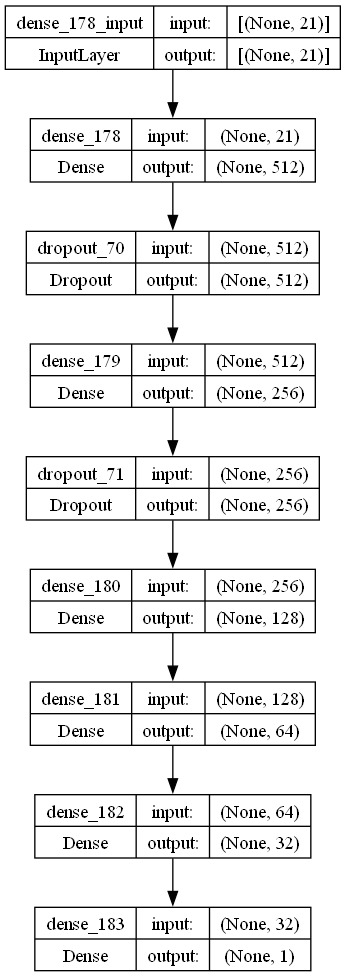

In [138]:
optimizer = Adamax(learning_rate=lr_schedule)

model = Sequential()
model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Batch normalization

In [139]:
def run_Model(loss='binary_crossentropy', X_train = X_train, Y_train = Y_train, X_val = X_val, Y_val = Y_val, X_test = X_test, Y_test = Y_test, shape = (X_train.shape[1],)):
    batch_size = 64
    learning_rate = 1e-2
    decay_steps = 10000
    decay_rate = 0.9

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate
    )

    optimizer = Adamax(learning_rate=lr_schedule)  
    model = Sequential()
    model.add(Dense(units=512, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units=256, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=120, validation_data=(X_val, Y_val), verbose=0, callbacks=[early_stopping])
    loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
    stopped_epoch = early_stopping.stopped_epoch

    result = add_to_results('BN [512,256,128,64,32,1]', batch_size, f'EarlyStopping({stopped_epoch})', 'Adamax(ExponentialDecay)', history, acc_test, loss_test, loss)

    dfs.append(result)
    visualize_results(result)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"BN [512,256,128,64,32,1]",64,EarlyStopping(26),Adamax(ExponentialDecay),binary_crossentropy,0.970293,0.067241,0.964585,0.084427,0.965314,0.082607


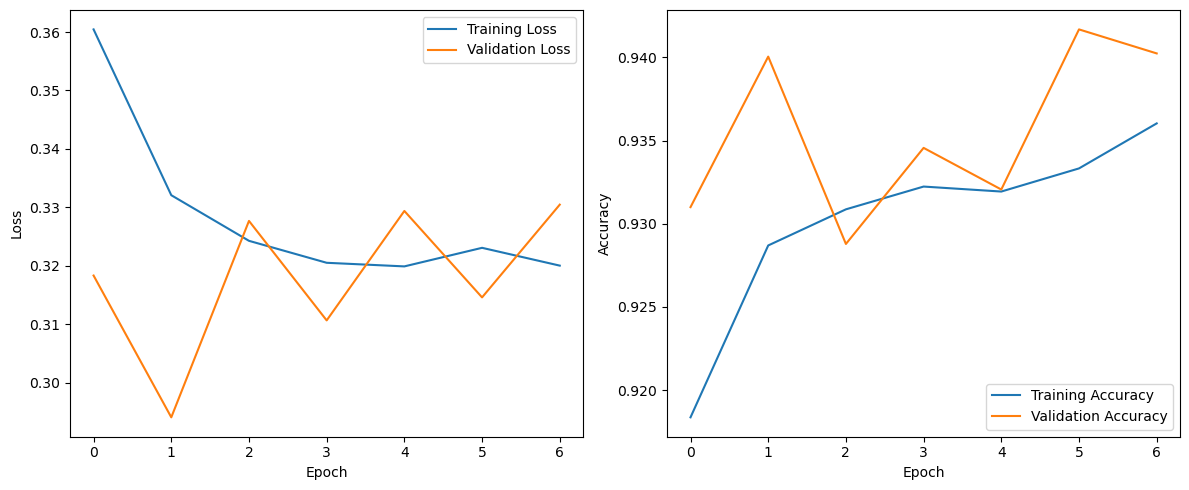

In [140]:
run_Model()

# Svi rezultati

In [141]:
results = pd.concat(dfs, ignore_index=True)
display(results)

results.to_csv('rezultati.csv', index=False)

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
0,"[8,D,4,2,1]",16,EarlyStopping(21),Adam(0.01),binary_crossentropy,0.938618,0.153520,0.949283,0.128370,0.946566,0.127908
1,"[32,D,1]",16,EarlyStopping(22),Adam(0.01),binary_crossentropy,0.955407,0.110452,0.957078,0.100393,0.957538,0.102987
2,"[64,D,32,D,32,1]",16,EarlyStopping(27),Adam(0.01),binary_crossentropy,0.956894,0.105026,0.961313,0.097492,0.961426,0.094785
3,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(6),Adam(0.01),binary_crossentropy,0.868692,0.383822,0.878549,0.370906,0.937635,0.137701
4,"[512,D,256,D,1]",16,EarlyStopping(13),Adam(0.01),binary_crossentropy,0.945494,0.137789,0.945722,0.118087,0.953265,0.114382
5,"[32,D,1]",16,EarlyStopping(45),Adamax(0.01),binary_crossentropy,0.956477,0.103931,0.958329,0.096632,0.960002,0.097180
6,"[64,D,32,D,32,1]",16,EarlyStopping(23),Adamax(0.01),binary_crossentropy,0.962208,0.088672,0.962564,0.085447,0.963312,0.086667
7,"[512,D,256,D,1]",16,EarlyStopping(11),Adamax(0.01),binary_crossentropy,0.965898,0.079110,0.962852,0.091550,0.961965,0.086393
8,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.964970,0.087367,0.964929,0.085613
9,"[32,D,1]",16,EarlyStopping(11),Nadam(0.01),binary_crossentropy,0.951493,0.116485,0.948898,0.112383,0.955305,0.105933


In [142]:
display(results.sort_values(by='Accuracy_test', ascending=False).head(5))

display(results.sort_values(by='Loss_test', ascending=True).head(5))

,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
19,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(29),Adamax(ExponentialDecay),square_loss,0.973587,0.019056,0.963911,0.027770,0.965353,0.026051
22,"BN [512,256,128,64,32,1]",64,EarlyStopping(26),Adamax(ExponentialDecay),binary_crossentropy,0.970293,0.067241,0.964585,0.084427,0.965314,0.082607
18,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(21),Adamax(ExponentialDecay),binary_crossentropy,0.970924,0.065572,0.962949,0.095303,0.965006,0.084399
16,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(15),Adamax(ExponentialDecay),binary_crossentropy,0.968999,0.069963,0.965836,0.084103,0.965006,0.084210
8,"[512,D,256,D,128,64,32,1]",16,EarlyStopping(19),Adamax(0.01),binary_crossentropy,0.967908,0.074739,0.964970,0.087367,0.964929,0.085613


,Layers,batch_size,epochs,optimizer,loss,Accuracy,Loss,Accuracy_val,Loss_val,Accuracy_test,Loss_test
19,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(29),Adamax(ExponentialDecay),square_loss,0.973587,0.019056,0.963911,0.027770,0.965353,0.026051
21,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(21),Adamax(ExponentialDecay),weighted_binary_crossentropy,0.964764,0.023056,0.962275,0.027646,0.961079,0.029300
20,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(58),Adamax(ExponentialDecay),abs_loss,0.923946,0.076056,0.926379,0.073596,0.925816,0.074199
22,"BN [512,256,128,64,32,1]",64,EarlyStopping(26),Adamax(ExponentialDecay),binary_crossentropy,0.970293,0.067241,0.964585,0.084427,0.965314,0.082607
16,"[512,D,256,D,128,64,32,1]",64,EarlyStopping(15),Adamax(ExponentialDecay),binary_crossentropy,0.968999,0.069963,0.965836,0.084103,0.965006,0.084210


# Zaključak

U ovom radu smo analizirali različite konfiguracije neuronskih mreža. Testirali smo arhitekture sa različitim brojem slojeva, sa primenom Dropout slojeva radi regularizacije, različitih optimizacijskih funkcija sa dodatom primenom dinamičkih stopa učenja ExponentialDecay metodom, EarlyStopping callback-a radi poboljšanja generalizacije mreže.
Testiranje dodavanjem dodatnog sloja sa l1_l2 regularizatorima, kao i sa BatchNormalization slojem radi stabilizacije učenja. 
Dodate su custom loss funkcije koje su bazirane na kvadratnoj i apsolutnoj razlici.

Nad testnim podacima dobijen je najbolji rezultat acc = 0.9653 i loss = 0.026 nad mrezom [512, D,256,D,128,64,32,1] sa Adamax optimizatorom i dinamičkom stopom učenja, sa dodatim EarlyStopping callback-om, batch_size=64 i custom loss funkcijom square_loss.